>> # Projeto de Clusterização de Municípios 

>> # Ralisson Araujo Ribeiro


Objetivo: 


- Classificar os municípios brasileiros com base nas informações disponíveis (utilize um algoritmo de 
- cluster, se julgar necessário). Caracterize os grupos de municípios criado da melhor maneira possível. 

- Quais grupos de municípios deveriam ser a porta de entrada para empresa no país? Por quê?

- Elaborar um modelo de classificação para o cálculo da probabilidade de um determinado município pertencer a um dos grupos criados.


> # <font color='blue'> Etapa de clusterização dos municípios</font>

#### Importando dataset e pacotes necessários a análise

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [41]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [3]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go

In [4]:
# Carrega o dataset
dados = pd.read_csv('base.csv', delimiter=";", decimal=",")
dados.tail(5)

,cod,municipio,area,densidade_demografica,distancia_capital,esperanca_vida,mortalidade,taxa_fec_total,analfabetos_maisde25,renda_percapita,...,tx_alfab,med_anos_estudos,pop_maisde25_1991,pop_maisde25_2000,pop_maisde65_1991,pop_maisde65_2000,pop_total1991,pop_total2000,pop_urbana2000,pop_rural2000
5502,293360,Xique-Xique (BA),5987.5,7.4,517.2422,55.41,83.11,3.84,37.14,73.31,...,70.69,3.16,14678,17840,1950,2450,40373,44718,31565,13153
5503,251740,Zabelê (PB),143.4,12.8,268.3345,60.74,58.40,2.87,42.31,89.61,...,63.05,2.89,816,954,170,170,1728,1853,1186,667
5504,355715,Zacarias (SP),319.7,6.1,447.3906,76.02,8.13,2.21,14.77,195.16,...,86.92,4.82,971,1135,100,152,1961,1947,1332,615
5505,211400,Zé Doca (MA),2044.4,24.1,186.4669,60.02,61.43,3.33,44.67,77.08,...,65.24,2.89,12848,17631,1450,2302,36524,46134,29082,17052
5506,421985,Zortéa (SC),297.8,8.8,296.6572,74.40,14.87,2.50,8.08,211.65,...,92.33,4.86,1005,1310,73,111,2347,2633,2053,580


### Análise exploratória dos dados

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5507 entries, 0 to 5506
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cod                    5507 non-null   int64  
 1   municipio              5507 non-null   object 
 2   area                   5507 non-null   float64
 3   densidade_demografica  5507 non-null   float64
 4   distancia_capital      5507 non-null   float64
 5   esperanca_vida         5507 non-null   float64
 6   mortalidade            5507 non-null   float64
 7   taxa_fec_total         5507 non-null   float64
 8   analfabetos_maisde25   5507 non-null   float64
 9   renda_percapita        5507 non-null   float64
 10  gini                   5507 non-null   float64
 11  indigencia             5507 non-null   float64
 12  pobreza                5507 non-null   float64
 13  idh                    5507 non-null   float64
 14  freq_escola            5507 non-null   float64
 15  tx_a

In [6]:
dados.isnull().values.any()

False

In [7]:
dados.isna().values.any()

False

In [8]:
dados.describe(include='all')

,cod,municipio,area,densidade_demografica,distancia_capital,esperanca_vida,mortalidade,taxa_fec_total,analfabetos_maisde25,renda_percapita,...,tx_alfab,med_anos_estudos,pop_maisde25_1991,pop_maisde25_2000,pop_maisde65_1991,pop_maisde65_2000,pop_total1991,pop_total2000,pop_urbana2000,pop_rural2000
count,5507.000000,5507,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,...,5507.000000,5507.000000,5.507000e+03,5.507000e+03,5507.000000,5507.000000,5.507000e+03,5.507000e+03,5.507000e+03,5507.000000
unique,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Liberato Salzano (RS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,324164.517342,NaN,1549.211476,96.731869,253.212621,67.748925,34.083376,2.864845,26.668411,170.814160,...,78.230626,4.039279,1.221264e+04,1.551693e+04,1286.757581,1804.085709,2.666167e+04,3.083333e+04,2.505066e+04,5782.678591
std,97977.633891,NaN,5738.392465,524.006185,163.210531,4.860915,18.470551,0.744454,15.164462,96.425347,...,12.460251,1.288171,8.923783e+04,1.039028e+05,9290.633699,12584.258093,1.690004e+05,1.867506e+05,1.800123e+05,10438.887430
min,110001.000000,NaN,2.900000,0.100000,0.000000,54.350000,5.380000,1.560000,2.020000,28.380000,...,39.340000,0.810000,2.390000e+02,4.220000e+02,17.000000,27.000000,6.180000e+02,7.950000e+02,0.000000e+00,0.000000
25%,251125.000000,NaN,205.700000,11.300000,121.858900,64.530000,18.640000,2.320000,13.970000,86.495000,...,67.930000,3.010000,2.119500e+03,2.502000e+03,241.000000,330.500000,4.945000e+03,5.152500e+03,2.402500e+03,1843.000000
50%,314467.000000,NaN,417.200000,23.600000,228.262900,68.240000,29.510000,2.670000,22.600000,159.100000,...,82.040000,4.070000,4.084000e+03,4.930000e+03,483.000000,652.000000,9.748000e+03,1.041800e+04,5.314000e+03,3666.000000
75%,411655.000000,NaN,1031.450000,48.000000,358.072050,71.440000,46.150000,3.230000,39.780000,232.695000,...,88.340000,4.910000,8.104000e+03,1.004000e+04,988.000000,1321.500000,1.897450e+04,2.135650e+04,1.324050e+04,7223.000000


In [9]:
#vamos guarda essa informação para ser usando poosterioemente
dados.columns

Index(['cod', 'municipio', 'area', 'densidade_demografica',
       'distancia_capital', 'esperanca_vida', 'mortalidade', 'taxa_fec_total',
       'analfabetos_maisde25', 'renda_percapita', 'gini', 'indigencia',
       'pobreza', 'idh', 'freq_escola', 'tx_alfab', 'med_anos_estudos',
       'pop_maisde25_1991', 'pop_maisde25_2000', 'pop_maisde65_1991',
       'pop_maisde65_2000', 'pop_total1991', 'pop_total2000', 'pop_urbana2000',
       'pop_rural2000'],
      dtype='object')

### Engenharia de atributos

In [10]:
# Vamos excluir algumas features que consideramos desnecessárias no momento.
dados2 = dados.drop(columns=[ 'cod', 'municipio', 'area','pop_total1991', 'pop_maisde65_1991', 'pop_maisde25_1991'], inplace=False)

In [11]:
dados2.describe()

,densidade_demografica,distancia_capital,esperanca_vida,mortalidade,taxa_fec_total,analfabetos_maisde25,renda_percapita,gini,indigencia,pobreza,idh,freq_escola,tx_alfab,med_anos_estudos,pop_maisde25_2000,pop_maisde65_2000,pop_total2000,pop_urbana2000,pop_rural2000
count,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5507.000000,5.507000e+03,5507.000000,5.507000e+03,5.507000e+03,5507.000000
mean,96.731869,253.212621,67.748925,34.083376,2.864845,26.668411,170.814160,0.560734,49.786210,47.086060,0.699339,77.966868,78.230626,4.039279,1.551693e+04,1804.085709,3.083333e+04,2.505066e+04,5782.678591
std,524.006185,163.210531,4.860915,18.470551,0.744454,15.164462,96.425347,0.058663,10.571483,10.732511,0.083485,6.708877,12.460251,1.288171,1.039028e+05,12584.258093,1.867506e+05,1.800123e+05,10438.887430
min,0.100000,0.000000,54.350000,5.380000,1.560000,2.020000,28.380000,0.360000,0.020000,15.760000,0.467000,44.500000,39.340000,0.810000,4.220000e+02,27.000000,7.950000e+02,0.000000e+00,0.000000
25%,11.300000,121.858900,64.530000,18.640000,2.320000,13.970000,86.495000,0.520000,42.830000,38.190000,0.630000,73.990000,67.930000,3.010000,2.502000e+03,330.500000,5.152500e+03,2.402500e+03,1843.000000
50%,23.600000,228.262900,68.240000,29.510000,2.670000,22.600000,159.100000,0.560000,49.510000,46.230000,0.713000,78.400000,82.040000,4.070000,4.930000e+03,652.000000,1.041800e+04,5.314000e+03,3666.000000
75%,48.000000,358.072050,71.440000,46.150000,3.230000,39.780000,232.695000,0.600000,56.455000,55.410000,0.768000,82.390000,88.340000,4.910000,1.004000e+04,1321.500000,2.135650e+04,1.324050e+04,7223.000000
max,12881.400000,1474.314600,78.180000,109.670000,7.790000,70.260000,954.650000,0.820000,88.350000,83.030000,0.919000,107.690000,99.090000,9.650000,5.825893e+06,670780.000000,1.043425e+07,9.813187e+06,621065.000000


In [12]:
# Matriz de Correlação com nomes das variáveis
correlations = dados2.corr()
correlations = pd.DataFrame(correlations)
correlations.sample(3)

,densidade_demografica,distancia_capital,esperanca_vida,mortalidade,taxa_fec_total,analfabetos_maisde25,renda_percapita,gini,indigencia,pobreza,idh,freq_escola,tx_alfab,med_anos_estudos,pop_maisde25_2000,pop_maisde65_2000,pop_total2000,pop_urbana2000,pop_rural2000
analfabetos_maisde25,-0.142469,0.056999,-0.787952,0.830561,0.613018,1.000000,-0.820630,0.349886,0.281716,0.788851,-0.951134,-0.220123,-0.992844,-0.899873,-0.104712,-0.087800,-0.102290,-0.113946,0.134975
taxa_fec_total,-0.125390,0.101391,-0.559984,0.574160,1.000000,0.613018,-0.601472,0.395471,0.293682,0.663022,-0.662454,-0.269374,-0.603517,-0.620588,-0.093322,-0.085567,-0.087991,-0.099533,0.142244
renda_percapita,0.226604,-0.066495,0.720068,-0.740418,-0.601472,-0.820630,1.000000,-0.224091,-0.115312,-0.728760,0.889759,0.238492,0.810850,0.883836,0.221073,0.204904,0.217440,0.229319,-0.064493


Na análise de correlação vamos escluir as colunas de População com mais de 65 anos em 2000 por ter forte correlação com População com mais de 25 anos em 2000.
Também vamos excluir as colunas de População Rural e Urbana, mantendo apenas a População Total, pelo mesmo motivo de que são colunas que apresentam colinearidade e isto iria atrapalhar o processo de descisão do algorítimo.

In [13]:
Renda_per_capita = correlations.query('0.5 < renda_percapita < 1')
Renda_per_capita

,densidade_demografica,distancia_capital,esperanca_vida,mortalidade,taxa_fec_total,analfabetos_maisde25,renda_percapita,gini,indigencia,pobreza,idh,freq_escola,tx_alfab,med_anos_estudos,pop_maisde25_2000,pop_maisde65_2000,pop_total2000,pop_urbana2000,pop_rural2000
esperanca_vida,0.075292,0.014745,1.000000,-0.950827,-0.559984,-0.787952,0.720068,-0.359076,-0.260686,-0.722592,0.899936,0.151768,0.780581,0.718126,0.049260,0.041389,0.044058,0.053189,-0.129025
idh,0.145870,-0.028490,0.899936,-0.914143,-0.662454,-0.951134,0.889759,-0.338936,-0.268432,-0.826314,1.000000,0.289532,0.947872,0.907759,0.116307,0.100958,0.112901,0.124943,-0.134778
tx_alfab,0.138637,-0.041032,0.780581,-0.829463,-0.603517,-0.992844,0.810850,-0.344502,-0.279126,-0.783533,0.947872,0.215483,1.000000,0.888880,0.102275,0.085088,0.099922,0.111579,-0.136522
med_anos_estudos,0.257012,-0.124662,0.718126,-0.744664,-0.620588,-0.899873,0.883836,-0.262325,-0.161894,-0.716511,0.907759,0.367375,0.888880,1.000000,0.212593,0.189177,0.214712,0.227152,-0.075921


Na análise de correlação vamos escluir as colunas de População com mais de 65 anos em 2000 por ter forte correlação com População com mais de 25 anos em 2000.
Também vamos excluir as colunas de População Rural e Urbana, mantendo apenas a População Total, pelo mesmo motivo de que são colunas que apresentam colinearidade e isto iria atrapalhar o processo de descisão do algorítimo.

In [14]:
dados2 = dados2.drop(columns=[ 'pop_rural2000', 'pop_urbana2000', 'pop_maisde65_2000'], inplace=False)

### Padronização dos Dados

In [15]:
#Vamos padronizar colocando os dados com média 0 e desvio padrão igual a 1
from sklearn.preprocessing import scale
dados2 = scale(dados2)

#### Redução de dimensionalidade de features - PCA

vamos reduzir um pouco mais nosso conjunto de dados, agora com um processo para manter os componentes principais para a análise de atributos

In [16]:
pca = PCA(n_components=5).fit_transform(dados2)

In [17]:
pca.shape

(5507, 5)

### Criando o modelo de agrupamento com o algorítimo K-means

Vamos primeiro estudar qual seria a melhor divisão de grupos. Vamos detalhar a segmentação dos grupos, centroides e distância entre os centroides para a constução de um gráfico com K agrupamentos(clusters)

In [18]:
#Criando um range de valores
k_range = range(2,25)

In [19]:
# Aplicando o modelo K-Means para cada valor de K 
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]

In [20]:
# Criando os centroides
centroids = [X.cluster_centers_ for X in k_means_var]

In [21]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [22]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [23]:
# Soma total dos quadrados
soma_total = sum(pdist(pca)**2)/pca.shape[0]

In [24]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variância explicada em função de K')

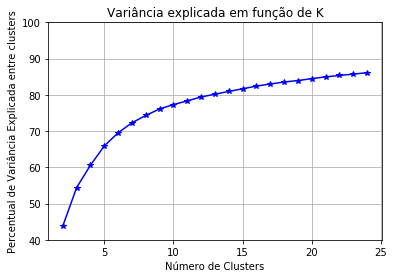

In [25]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((40,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada entre clusters')
plt.title('Variância explicada em função de K')

#### Métrica para avaliação do modelo de clusterização

Vamos usar a métrica Silhouette que me informa o qual bem os modelos estão separados, explicando quem tem menor variância dentro do grupo e maior variância entre os grupos. Quando mais próximo de 1, melhor.

https://en.wikipedia.org/wiki/Silhouette_(clustering)

In [26]:
# Criando um modelo com K = 5
modelo_v1 = KMeans(n_clusters =5)
modelo_v1.fit(pca)

# Silhouette Score
labels = modelo_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.28089364355942553

In [27]:
modelo_final = KMeans(n_clusters=5, random_state=101).fit(pca)

Após alguns testes decidimos usar 8 clusters para o nosso modelo

#### Criando um Cluster Map

In [28]:
# Criando lista de nome das colunas dos dataframe original
names = ['cod', 'municipio', 'area', 'densidade_demografica',
       'distancia_capital', 'esperanca_vida', 'mortalidade', 'taxa_fec_total',
       'analfabetos_maisde25', 'renda_percapita', 'gini', 'indigencia',
       'pobreza', 'idh', 'freq_escola', 'tx_alfab', 'med_anos_estudos',
       'pop_maisde25_1991', 'pop_maisde25_2000', 'pop_maisde65_1991',
       'pop_maisde65_2000', 'pop_total1991', 'pop_total2000', 'pop_urbana2000',
       'pop_rural2000']

In [29]:
# Cria o cluster map
cluster_map = pd.DataFrame(dados, columns = names)
cluster_map['cluster'] = modelo_final.labels_
cluster_map.shape

(5507, 26)

In [30]:
cluster_map.sample(4)

,cod,municipio,area,densidade_demografica,distancia_capital,esperanca_vida,mortalidade,taxa_fec_total,analfabetos_maisde25,renda_percapita,...,med_anos_estudos,pop_maisde25_1991,pop_maisde25_2000,pop_maisde65_1991,pop_maisde65_2000,pop_total1991,pop_total2000,pop_urbana2000,pop_rural2000,cluster
2145,420710,Ilhota (SC),245.2,43.0,82.1755,73.97,15.80,2.14,7.39,251.71,...,5.01,4082,5541,415,604,8852,10574,6445,4129,1
847,110004,Cacoal (RO),3808.4,19.3,400.7447,69.70,21.27,2.34,15.65,230.05,...,4.80,27469,34135,1720,2813,69725,73568,51398,22170,1
1197,311560,Cedro do Abaeté (MG),280.8,4.6,198.3084,73.86,18.14,2.71,23.02,173.06,...,3.93,712,712,83,95,1402,1289,1140,149,1
878,350920,Cajamar (SP),128.7,390.4,32.5385,69.21,19.88,2.55,10.22,297.67,...,5.65,13435,24742,746,1691,30757,50761,48084,2677,1


In [31]:
cluster_map.shape

(5507, 26)

Chegamos a um clusterização da base de dados inicial com a mesma contagem de registro.

In [32]:
base_cluster = cluster_map.set_index('cluster')

In [33]:
# Calcula a contagem de cidades por cluster
base_cluster.groupby('cluster')['cod'].count()

cluster
0    1741
1    2266
2       2
3      57
4    1441
Name: cod, dtype: int64

#### Gravando a base de dados com os agrupamentos

In [34]:
base_cluster.to_csv('base_cluster.csv')

> # <font color='blue'>Etapa de escolhas dos grupos de munícípios.</font>

Nesta etapa vamos selecionar alguns grupos que deveriam ser a porta de entrada da empresa no Brasil.
Apesar de não se saber exatamento o público alvo deste varejo, vamos considerar as melhores indicadores sócios-econômicos para a seleção dos grupos. Posteriomente estes grupos podem ser renomeados, mas para manter a reprodutibilidade do algoritmo, vamos deixar com as nomenclaturas de 0 a 7.

In [35]:
# Calcula a contagem de cidades por cluster
base_cluster.groupby('cluster')['cod'].count()

cluster
0    1741
1    2266
2       2
3      57
4    1441
Name: cod, dtype: int64

Vamos identificar alguns grupos que possuem poucos municípios, no caso os grupos 1, 3 e 2

In [36]:
# Identiificando o municipio do grupo 2 
base_cluster.loc[3].sample(7)

,cod,municipio,area,densidade_demografica,distancia_capital,esperanca_vida,mortalidade,taxa_fec_total,analfabetos_maisde25,renda_percapita,...,tx_alfab,med_anos_estudos,pop_maisde25_1991,pop_maisde25_2000,pop_maisde65_1991,pop_maisde65_2000,pop_total1991,pop_total2000,pop_urbana2000,pop_rural2000
cluster,,,,,,,,,,,,,,,,,,,,,
3,270430,Maceió (AL),512.8,1553.9,0.0000,65.03,43.69,2.21,18.78,282.99,...,83.13,6.56,273512,387942,23310,34782,629041,797759,795804,1955
3,354870,São Bernardo do Campo (SP),407.1,1720.5,17.7610,69.93,18.38,1.95,6.01,505.45,...,95.02,7.69,288560,383708,19026,31276,566893,703177,690917,12260
3,211130,São Luís (MA),831.7,1043.3,0.0000,69.19,27.44,2.00,8.68,252.13,...,92.69,7.72,256971,395034,20733,33360,666433,870028,837584,32444
3,355100,São Vicente (SP),148.8,2034.1,52.3680,69.93,18.38,2.31,7.54,330.52,...,93.69,6.81,134181,162200,12335,17459,268618,303551,303413,138
3,351500,Embu (SP),70.3,2941.4,24.6926,69.99,18.26,2.44,9.37,244.20,...,92.31,5.57,65777,97757,2971,5024,155990,207663,207663,0
3,352500,Jandira (SP),17.6,5211.4,27.2911,71.35,15.62,2.58,8.52,290.48,...,93.37,6.02,26869,43762,1341,2326,62697,91807,91807,0
3,330045,Belford Roxo (RJ),80.0,5414.0,24.9237,67.64,23.52,2.32,9.76,182.33,...,91.99,5.64,169621,221189,12496,20503,360259,434474,434474,0


In [37]:
base_cluster2 = base_cluster.reset_index()

In [38]:
base_cluster2.head()

,cluster,cod,municipio,area,densidade_demografica,distancia_capital,esperanca_vida,mortalidade,taxa_fec_total,analfabetos_maisde25,...,tx_alfab,med_anos_estudos,pop_maisde25_1991,pop_maisde25_2000,pop_maisde65_1991,pop_maisde65_2000,pop_total1991,pop_total2000,pop_urbana2000,pop_rural2000
0,1,520005,Abadia de Goiás (GO),136.9,36.3,21.4143,67.58,27.70,2.85,15.64,...,88.03,4.87,1872,2433,121,227,4227,4971,3096,1875
1,1,310010,Abadia dos Dourados (MG),897.4,7.2,390.8765,72.92,20.51,2.54,14.48,...,86.58,4.36,3308,3781,354,459,6492,6446,3927,2519
2,4,520010,Abadiânia (GO),1047.7,10.9,78.6414,69.59,22.36,2.77,21.81,...,82.45,4.24,4241,5918,446,686,9402,11452,7206,4246
3,4,150010,Abaetetuba (PA),1613.9,73.8,51.1846,70.77,25.61,3.15,24.85,...,80.74,4.28,33554,44897,3792,4688,99989,119152,70843,48309
4,1,310020,Abaeté (MG),1822.4,12.3,172.3115,72.50,21.59,2.41,15.56,...,87.55,4.78,10163,12406,1084,1595,20689,22360,19022,3338


In [65]:

import plotly.offline as py
import plotly.express as px
df = base_cluster2
fig = px.scatter_matrix(df, dimensions=["renda_percapita", "idh", "gini"], color="cluster")
#fig.show()
py.plot(fig)


'temp-plot.html'

### Análise Exploratória dos dados dos grupos

In [39]:
clusters = base_cluster.groupby('cluster')[ 'densidade_demografica','renda_percapita', 'idh', 'gini'].mean()
clusters

,densidade_demografica,renda_percapita,idh,gini
cluster,,,,
0,33.524067,76.691114,0.597759,0.588346
1,85.627273,253.552714,0.777412,0.531443
2,5718.000000,603.345000,0.841500,0.620000
3,3691.063158,393.744561,0.809228,0.569474
4,40.582235,145.006086,0.694749,0.573005


#### Renda per Capita

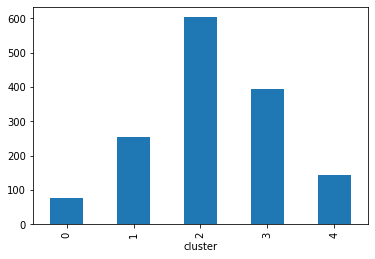

In [40]:
#Identificando a maior densidade demográfica
clusters.groupby('cluster')[ 'renda_percapita'].mean().plot.bar()

#### Densidade Demográfica

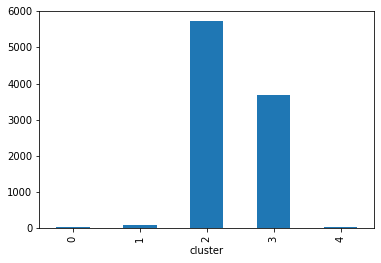

In [41]:
#Identificando o maior Indice de Densidade Demográfica
clusters.groupby('cluster')[ 'densidade_demografica'].mean().plot.bar()

> # <font color='blue'>Etapa de classificação dos municípios selecionados</font>

Com base nas escolhas acima vamos montar um modelo probalístico para classificação para um determinado município pertencer a um dos grupos criados.

### Importando dados

In [42]:
municipios = pd.read_csv('base_cluster.csv')

In [43]:
municipios.head(5)

,cluster,cod,municipio,area,densidade_demografica,distancia_capital,esperanca_vida,mortalidade,taxa_fec_total,analfabetos_maisde25,...,tx_alfab,med_anos_estudos,pop_maisde25_1991,pop_maisde25_2000,pop_maisde65_1991,pop_maisde65_2000,pop_total1991,pop_total2000,pop_urbana2000,pop_rural2000
0,1,520005,Abadia de Goiás (GO),136.9,36.3,21.4143,67.58,27.70,2.85,15.64,...,88.03,4.87,1872,2433,121,227,4227,4971,3096,1875
1,1,310010,Abadia dos Dourados (MG),897.4,7.2,390.8765,72.92,20.51,2.54,14.48,...,86.58,4.36,3308,3781,354,459,6492,6446,3927,2519
2,4,520010,Abadiânia (GO),1047.7,10.9,78.6414,69.59,22.36,2.77,21.81,...,82.45,4.24,4241,5918,446,686,9402,11452,7206,4246
3,4,150010,Abaetetuba (PA),1613.9,73.8,51.1846,70.77,25.61,3.15,24.85,...,80.74,4.28,33554,44897,3792,4688,99989,119152,70843,48309
4,1,310020,Abaeté (MG),1822.4,12.3,172.3115,72.50,21.59,2.41,15.56,...,87.55,4.78,10163,12406,1084,1595,20689,22360,19022,3338


In [44]:
municipios.groupby('cluster')[ 'densidade_demografica','renda_percapita', 'idh', 'gini'].mean()

,densidade_demografica,renda_percapita,idh,gini
cluster,,,,
0,33.524067,76.691114,0.597759,0.588346
1,85.627273,253.552714,0.777412,0.531443
2,5718.000000,603.345000,0.841500,0.620000
3,3691.063158,393.744561,0.809228,0.569474
4,40.582235,145.006086,0.694749,0.573005


### Engenharia de atributos

In [ ]:
# Vamos excluir algumas features que consideramos desnecessárias no momento.
municipios2 = municipios.drop(columns=[ 'cod', 'municipio', 'area','pop_total1991', 'pop_maisde65_1991',
                                       'pop_maisde25_1991','pop_rural2000', 'pop_urbana2000',
                                       'pop_maisde65_2000'], inplace=False)

In [ ]:
municipios2.sample(5)

### Modelagem preditiva do dados com algoritimo de classificação multiclasses

In [ ]:
# Vamos separar as colunas em Features e Target
features = municipios2[
    [
        
   'densidade_demografica', 'distancia_capital',
       'esperanca_vida', 'mortalidade', 'taxa_fec_total',
       'analfabetos_maisde25', 'renda_percapita', 'gini', 'indigencia',
       'pobreza', 'idh', 'freq_escola', 'tx_alfab', 'med_anos_estudos',
       'pop_maisde25_2000', 'pop_total2000'
    ]
    
]
target = municipios2['cluster']  

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
#Divisão do dataset em treino e teste

from sklearn.model_selection import train_test_split

X = features
Y = target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=133)

In [ ]:
# Avaliação do modelo usando o 

from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Separando as features e target
X = features
Y = target

# Divide os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 5)

# Criando o modelo
Model = GaussianNB()


# Definindo os valores para o número de folds
num_folds = 10
seed = 7
    
# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)    
    

# Treinando o modelo
Model.fit(X_train, Y_train)


# Previsão do modelo

Predict = Model.predict(X_test)


# Acurácia final e ROC
resultadoAC = cross_val_score(Model, X, Y, cv = kfold, scoring = 'accuracy')
#resultadoROC = cross_val_score(Model, X, Y, cv = kfold, scoring = 'roc_auc')

print("A Acurácia foi de: %.3f%%" % (resultadoAC.mean() * 100.0))
#print("ROC foi de: %.3f" % (resultadoROC.mean() * 100))

report = classification_report(Y_test, Predict)

# Imprimindo o relatório
print(report)

#### Nosso modelo possui uma acurácia de 88%. Ou seja uma probabilidade de 88% que um municipio ser classificado corretamente.

## FIM